<a href="https://colab.research.google.com/github/Bigfredoh/Machine-Learning/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing of Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Loading of Dataset

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Renaming of Columns

In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_df.columns = ['MixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
       'Chlorides', 'FreeSulfurdioxide', 'TotalSulfurdioxide', 'Density',
       'pH', 'Sulphates', 'Alcohol', 'Quality']

In [6]:
wine_df.head()

,MixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurdioxide,TotalSulfurdioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploration of Dataset

In [7]:
wine_df.describe()

,MixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurdioxide,TotalSulfurdioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MixedAcidity        1599 non-null   float64
 1   VolatileAcidity     1599 non-null   float64
 2   CitricAcid          1599 non-null   float64
 3   ResidualSugar       1599 non-null   float64
 4   Chlorides           1599 non-null   float64
 5   FreeSulfurdioxide   1599 non-null   float64
 6   TotalSulfurdioxide  1599 non-null   float64
 7   Density             1599 non-null   float64
 8   pH                  1599 non-null   float64
 9   Sulphates           1599 non-null   float64
 10  Alcohol             1599 non-null   float64
 11  Quality             1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
wine_df.Quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: Quality, dtype: int64

There are two classification of wine quality observed from the dataset. They are:

3,4,5,6 ==> Bad Quality wine(0), 
7,8==> Good Quality wine(1)

In [10]:
wine_df.replace({'Quality':{3:0, 4:0, 5:0, 6:0, 7:1,8:1}}, inplace = True)

In [11]:
wine_df.head()

,MixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurdioxide,TotalSulfurdioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


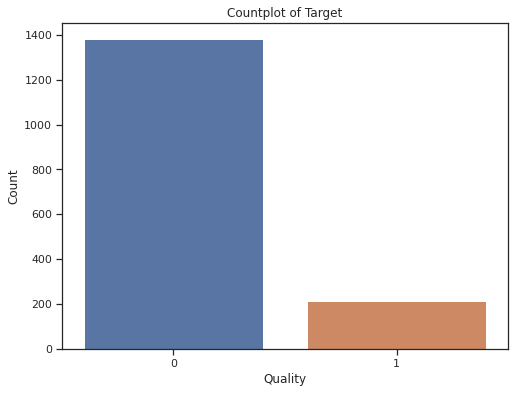

In [12]:
sns.set(style="ticks")
plt.rcParams["figure.figsize"] = [8, 6]
sns.countplot(data = wine_df, x= 'Quality')
plt.title('Countplot of Target')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [13]:
print(wine_df.corr())

                    MixedAcidity  VolatileAcidity  ...   Alcohol   Quality
MixedAcidity            1.000000        -0.256131  ... -0.061668  0.120061
VolatileAcidity        -0.256131         1.000000  ... -0.202288 -0.270712
CitricAcid              0.671703        -0.552496  ...  0.109903  0.214716
ResidualSugar           0.114777         0.001918  ...  0.042075  0.047779
Chlorides               0.093705         0.061298  ... -0.221141 -0.097308
FreeSulfurdioxide      -0.153794        -0.010504  ... -0.069408 -0.071747
TotalSulfurdioxide     -0.113181         0.076470  ... -0.205654 -0.139517
Density                 0.668047         0.022026  ... -0.496180 -0.150460
pH                     -0.682978         0.234937  ...  0.205633 -0.057283
Sulphates               0.183006        -0.260987  ...  0.093595  0.199485
Alcohol                -0.061668        -0.202288  ...  1.000000  0.407315
Quality                 0.120061        -0.270712  ...  0.407315  1.000000

[12 rows x 12 columns]


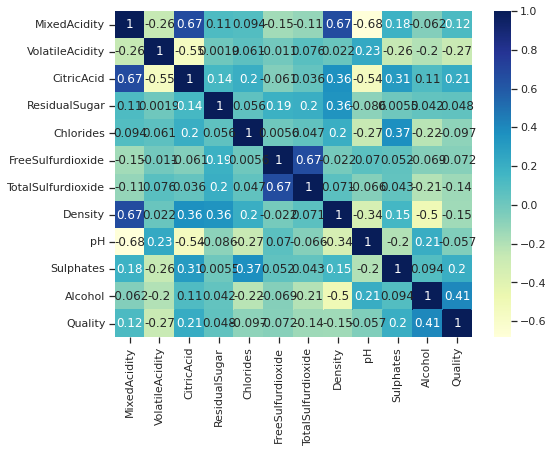

In [14]:
dataplot = sns.heatmap(wine_df.corr(), cmap="YlGnBu", annot=True)

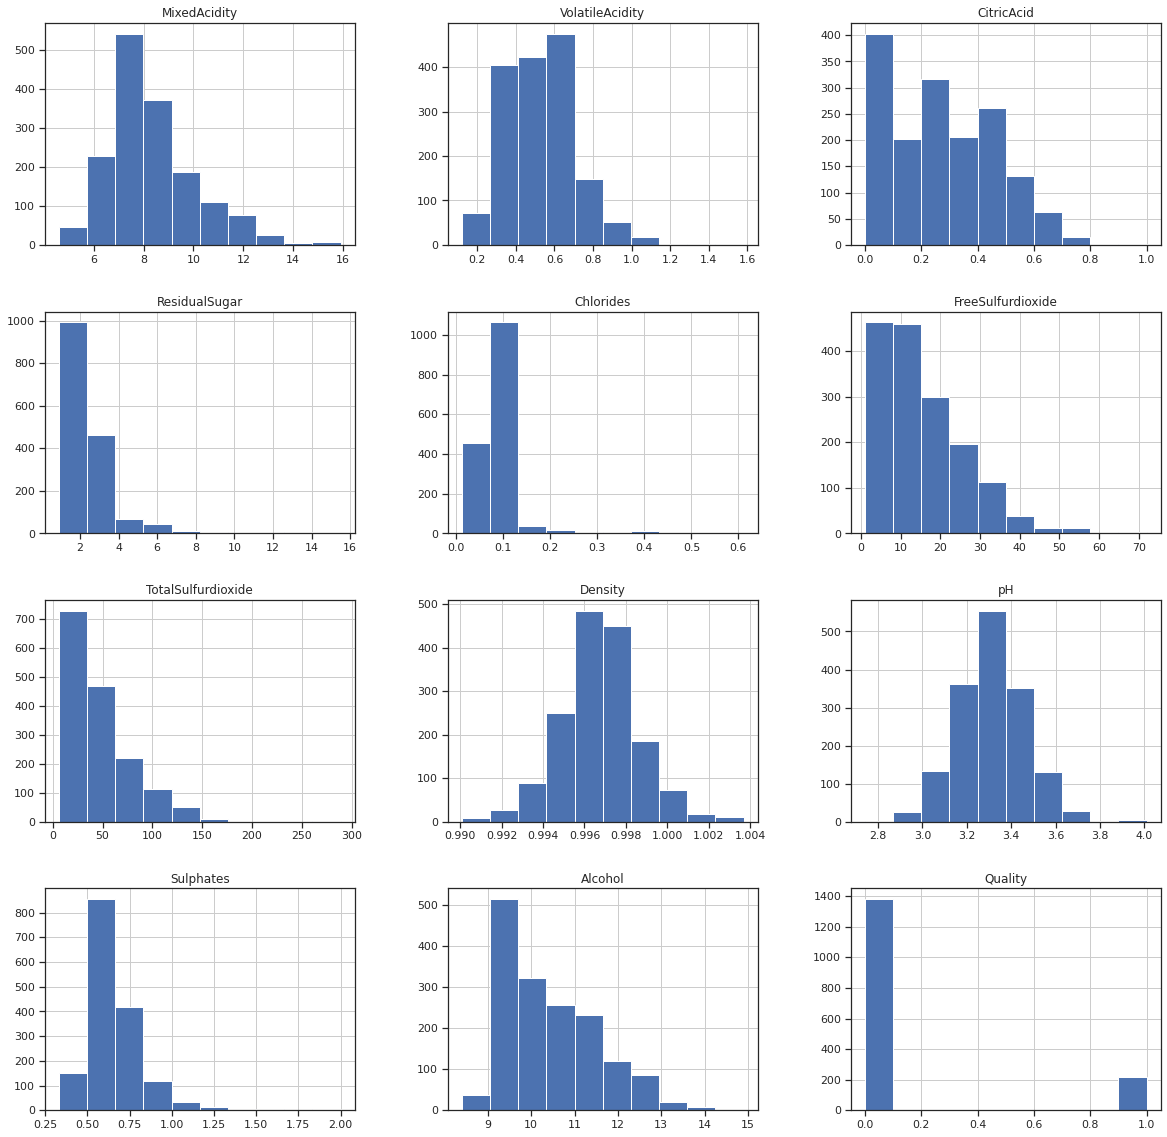

In [15]:
wine_df.hist(figsize=(20, 20))
plt.show()

# Identifying of Dependent Feature and Inpendent Features 

In [16]:
X = wine_df.drop(columns='Quality', axis = 1).values
y = wine_df.Quality.values

# Normalisation of Independent Features

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting of Dataset into Training Set and Test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [19]:
X_train.shape

(1199, 11)

In [20]:
y_train.shape

(1199,)

# Applying Cross Validation, Training and Testing of Dataset using various Classifiers


In [62]:
# Naive Bayes Classifier
gnb= GaussianNB()

In [63]:
cv_scores = cross_val_score(gnb, X_train, y_train, cv=10)*100
gnb_mean =cv_scores.mean()
print(cv_scores)
print(gnb_mean)


[82.5        85.83333333 87.5        86.66666667 79.16666667 75.
 83.33333333 86.66666667 84.16666667 84.03361345]
83.48669467787114


In [64]:
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, gnb_pred) * 100
print('Accuracy:', gnb_acc)

Accuracy: 84.75


In [46]:
# RandomForest Classifier

In [47]:
rfc= RandomForestClassifier()

In [48]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=10)*100
rfc_mean =cv_scores.mean()
print(cv_scores)
print(rfc_mean)


[88.33333333 90.         93.33333333 91.66666667 90.         87.5
 90.         91.66666667 91.66666667 88.23529412]
90.24019607843137


In [49]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred) * 100
print('Accuracy:', rfc_acc)

Accuracy: 91.25


In [53]:
# Decision Tree Classifier
dt =  DecisionTreeClassifier()
cv_scores = cross_val_score(dt, X_train, y_train, cv=10)*100
dt_mean =cv_scores.mean()
print(cv_scores)
print(dt_mean)


[85.         82.5        93.33333333 86.66666667 85.83333333 75.
 86.66666667 88.33333333 90.         90.75630252]
86.40896358543417


In [54]:
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred) * 100
print('Accuracy:', dt_acc)

Accuracy: 87.75


In [57]:
# Support Vector Classifier (SVC)
svc =SVC()
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)*100
svc_mean =cv_scores.mean()
print(cv_scores)
print(svc_mean)

[86.66666667 85.83333333 91.66666667 88.33333333 88.33333333 85.83333333
 90.         89.16666667 89.16666667 85.71428571]
88.07142857142857


In [58]:
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, dt_pred) * 100
print('Accuracy:', svc_acc)

Accuracy: 87.75


In [66]:
models = [['Naive Bayes',  gnb_mean, gnb_acc],
          ['Decision Tree', dt_mean, dt_acc],
          ['Random Forest', rfc_mean, rfc_acc],
          ['Support Vector Classification', svc_mean, svc_acc]]

In [71]:
model_df = pd.DataFrame(models, columns=[['Model', 'Mean', 'Accuracy']])
model_df

,Model,Mean,Accuracy
0,Naive Bayes,83.486695,84.75
1,Decision Tree,86.408964,87.75
2,Random Forest,90.240196,91.25
3,Support Vector Classification,88.071429,87.75


**Observation**

---



From the various Classification algorithms used, it is observed that the accuracy of RandonForest Model gives the higest in comparism with other classification models. Therefore, RandomForest Algorithm will be used for this Dataset